# Peer-graded Assignment: Центральная предельная теорема своими руками

В данной задаче рассматривается __Распределение Парето__ [\[1\]](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE) [\[2\]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html) — двухпараметрическое семейство абсолютно непрерывных распределений, являющихся степенными. Распределение Парето встречается при исследовании различных явлений, в частности, социальных, экономических, физических и других. Наверное, самое знаменитое применение распределения Парето — мнемонический _принцип 20/80_ [\[3\]](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE), в наиболее общем виде формулируемый как _"20% усилий дают 80% результата"_. Согласно нему утверждается также, что _20% популяции владеет 80% богатства_, однако могут встречаться существенные количественные отклонения.


Пусть случайная величина $X$ такова, что ее распределение задаётся равенством:

$F_{X}(x) = P(X<x) = 1-\left(\frac {x_m}{x}\right)^{k},\forall x\geq x_{m}$,
где $x_{m}, k > 0$. 

Тогда говорят, что $X$ имеет распределение Парето с параметрами $x_{m}$ и $k$. 

Моменты случайной величины, имеющей распределение Парето, задаются формулой:

$E[X^n]=\frac{k x_m^n}{k-n}$,

откуда в частности:

$E[X]=\frac{k x_m}{k-1}$, $D[X]=(\frac{x_m}{k-1})^2(\frac{k}{k-2})$ для $k > 2$,


где $x_m \geq 1$ — минимальное (обязательно положительное) возможное значение $X$, а $k$ — индекс Парето или параметр формы распределения.

Для решения задачи мы зафиксируем значение параметра $k = 5$.

In [1]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline

На первом этапе мы генерируем выборку объема $1000$, для которой строим гистогамму и теоретическую плотность распределения случайной величины.

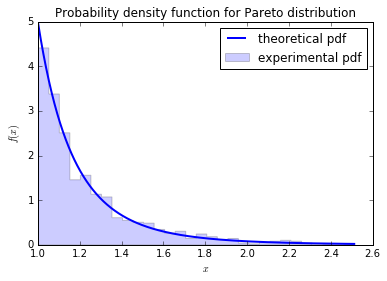

In [2]:
k = 5.0 # shape parameter
rv = sts.pareto(k)

size = 1000
a = rv.ppf(0.01)
b = rv.ppf(0.99)

x = np.linspace(a, b, size) # evenly spaced numbers over a specified interval
y = rv.pdf(x) # probability density function
r = rv.rvs(size) # generate random numbers

plt.plot(x, y, 'b', lw=2, label='theoretical pdf')
plt.hist(r, range=(a, b), bins=30, normed=True, alpha=0.2, histtype='stepfilled', label='experimental pdf')

plt.title("Probability density function for Pareto distribution")
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()

Посчитаем среднее и дисперсию выбранного распределения согласно представленным выше формулам.

In [3]:
xm = 1.0 # minimum possible value of X

E = (xm * k) / (k - 1.0) # expected value
D = ((xm / (k - 1.0))**2) * (k / (k - 2.0)) # variance

print E, D # or just use sts.pareto.stats(k, moments='mvsk')

1.25 0.104166666667


Задачей является оценка распределения выборочного среднего случайной величины при разных объемах выборок. Для этого при трёх и более значениях $n$ нужно сгенерировать $1000$ выборок объема $n$ и построить гистограммы распределений их выборочных средних.

Используя информацию о среднем и дисперсии исходного распределения, необходимо посчитать значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. 

Поверх каждой гистограммы нарисуем плотность соответствующего нормального распределения.  

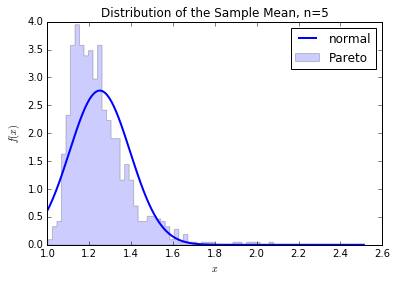

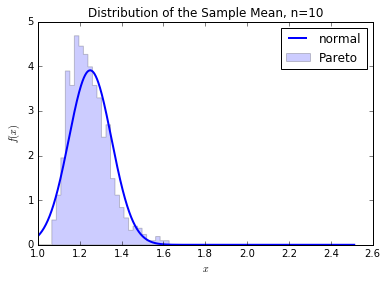

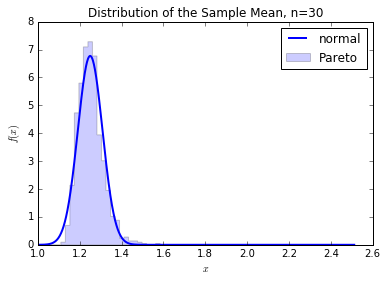

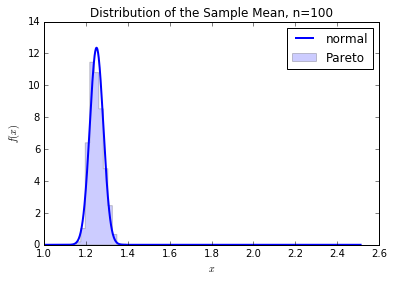

In [4]:
for n in [5, 10, 30, 100]:
    means = np.array([])
    for _ in range(1000):
        means = np.append(means, rv.rvs(n).mean())
    
    SD = math.sqrt(D / n) # standard deviation
    norm = sts.norm(E, SD) 

    plt.plot(x, norm.pdf(x), 'b', lw=2, label='normal')
    plt.hist(means, range=(a,b), bins=70, normed=True, alpha=0.2, histtype='stepfilled', label='Pareto')
    
    plt.title("Distribution of the Sample Mean, n={}".format(n))
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.legend()
    plt.show()

Как видно из полученных графиков для непрерывного распределения Парето, с увеличением размера выборки $n$ распределение средних значений начинает сходиться к теоретическому среднему и точность аппроксимации распределения выборочных средних значений увеличивается. При этом гистограммы имеют распределение, близкое к нормальному, что соответствует утверждению Центральной Предеьной Теоремы.